In [2]:
from sklearn.neighbors import NearestNeighbors, kneighbors_graph
from math import inf
import numpy as np
from matplotlib import pyplot as plt
import math
import sys

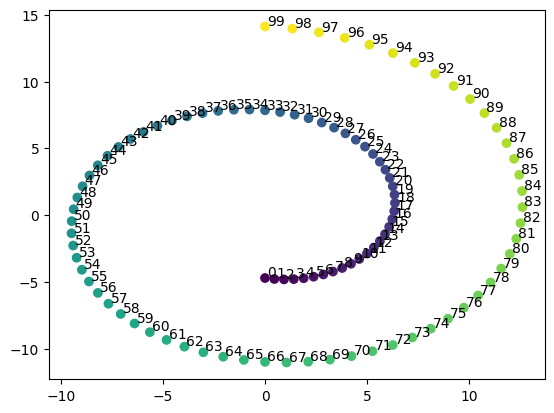

In [5]:
N = 100

phi = np.linspace(1.5*math.pi, 4.5*math.pi, N)

x = phi*np.cos(phi)
y = phi*np.sin(phi)

X = np.array([x,y]).reshape(2,N).T

plt.scatter(x,y, c = phi)

_ = [plt.text(x[i]+0.1, y[i]+0.1, str(i)) for i in range(len(x))]


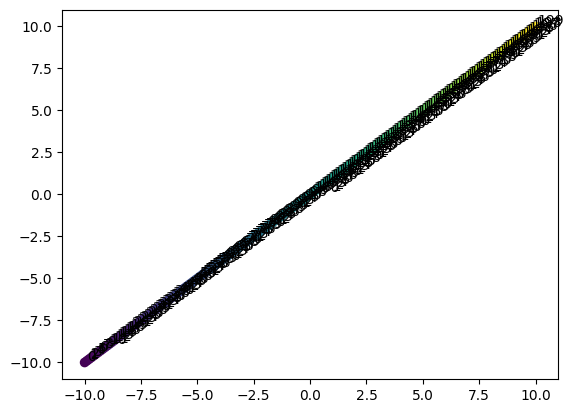

In [262]:
N = 200

phi = np.linspace(-10, 10, N)

x = phi
y = phi

X = np.array([x,y]).reshape(2,N).T

plt.scatter(x,y, c = phi)

_ = [plt.text(x[i]+0.1, y[i]+0.1, str(i)) for i in range(len(x))]

In [6]:
graph_ = kneighbors_graph(X, n_neighbors= 99 ).toarray()
graph_

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [7]:
# apply floyd-warshall
n_nodes = graph_.shape[0]

for i in range(n_nodes):
    for j in range(n_nodes):
        if i != j and graph_[i,j]== 0:
            graph_[i,j] = inf # use a large number instead of math.inf for numerical reason

D = np.copy(graph_)
for k in range(n_nodes):
    for i in range(n_nodes):
        for j in range(n_nodes):
            if D[i,k] + D[k,j] < D[i,j]:
                D[i,j] = D[i,k] + D[k,j]

np.set_printoptions(threshold=sys.maxsize)

D = D**2

In [8]:
J = np.eye(n_nodes) - 1/n_nodes * np.dot(np.ones(n_nodes), np.ones(n_nodes).T)

G = -1/2 * np.dot(J, np.dot(D, J)) # G is non sym since D is non sym

In [9]:
eig_vals, eig_vecs = np.linalg.eig(G)
eig_vals = np.where(eig_vals<0,0, eig_vals)
# eig_vecs.T gioca il ruolo di U in G = UspettroU'

In [10]:
sorted_indices = np.argsort(eig_vals)[::-1]
sorted_eigvecs = eig_vecs[:,sorted_indices]
sorted_eigvals = eig_vals[sorted_indices]

# select the first k eigenvector(s) and project
top_k_eigvecs = sorted_eigvecs[:,:2]
top_k_eigvals = sorted_eigvals[:2]

projection_matrix = top_k_eigvecs

In [11]:
Y = np.dot(projection_matrix, np.sqrt(np.diag(top_k_eigvals)))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


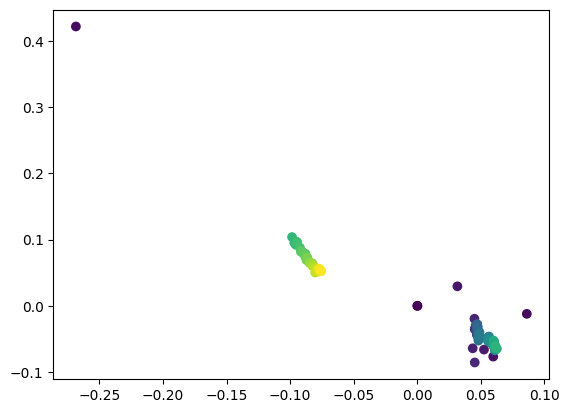

In [12]:
plt.scatter(Y[:,0], Y[:,1], c = phi)